# Problem 2

## Setup

In [2]:
import sys
import numpy as np

sys.path.append("../src")

from nat2324.problems.sumplete import Sumplete
from nat2324.algorithms.ga import BinaryGeneticAlgorithm
import matplotlib.pyplot as plt
from nat2324.utils import run_optimization_experiment, visualize_optimization_experiments

%load_ext autoreload
%autoreload 2

In [354]:
sumplete = Sumplete(K=7, evaluation_type="distance", low=1, high=9)
ga = BinaryGeneticAlgorithm(
    sumplete.evaluate,
    N=1000,
    D=sumplete.K**2,
    # use_refit=False,
    # use_escape=False,
    # p_c=0.7,
    # p_m=0.1,
    # p_flip=0.5,
    # elite_frac=0.0,
    # num_cross_points=3,
    # mutation_type="row_col_gen",
    # selection_type = "tournament",
    # mutation_type = "bit_flip",
    crossover_type="row_col",
    # mutation_type="bit_flip",
    mutation_type="axis_shuffle",
    # decay_factor=0.999,
    # tournament_size=4,
    # use_refit=False,
    # use_escape=False,
    # parallelize_fitness=True,
)

In [355]:
solution = ga.run(max_generations=1000, patience=100000, best_score=1, returnable=("score", "solution", "duration", "num_generations", "last_population", "last_fitnesses"))

Current best N/A:   0%|          | 0/1000 [00:00<?, ?it/s]

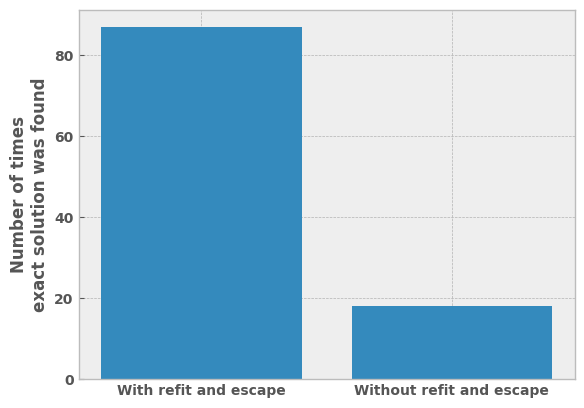

In [46]:
# Initialize the sumplete problem with K=7 and evaluation_type="sum"
sumplete = Sumplete(K=7, evaluation_type="sum", low=1, high=9)

# Setup variable params
experiment_setup = {
    ("use_refit", "use_escape"): [(True, True), (False, False)],
}

# Setup static params
default_kwargs = {
    "fitness_fn": sumplete,
    'D': sumplete.K**2,
    "p_m": 0.35,
    "mutation_type": "row_col_shuffle",
    "crossover_type": "n_point",
    "tournament_size": 4,
    "num_cross_points": 3,
    "max_generations": 1000,
    "best_score": 1,
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    BinaryGeneticAlgorithm.experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=100,
    average=False,
    dirname="../experiments/problem2/runs",
)

# Visualize the results on a bar plot
labels = ["With refit and escape", "Without refit and escape"]
plt.bar(labels, (results[("use_refit", "use_escape")] >= 1).sum(axis=(1, 2)))
plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")
plt.ylabel("Number of times\nexact solution was found", fontsize=12, fontweight="bold")
plt.style.use("bmh")
plt.savefig("../experiments/problem2/plots/refit_escape.png", dpi=300)
plt.show()

In [14]:
sumplete.show(solution[1])

+-------------------------------------------------+
|     6     4                 3           8     7 | 28
|           4     6     6           7             | 23
|     4     2     5     4     2           6     8 | 31
|     6                 6           4     4       | 20
|           3     5                 5     4     8 | 25
|     7     3     4     5     6     2           8 | 35
|     5     8     1           8     5           8 | 35
|     2     1     6           3     4     3     8 | 27
+-------------------------------------------------+
     30    25    27    21    22    27    25    47


In [804]:
sumplete.show()

+-------------------------------------------+
|     7     6     4     7     8     1     7 | 27
|     6     1     6     5     8     3     7 | 22
|     2     3     6     3     3     2     8 | 5
|     6     7     1     3     1     5     8 | 25
|     6     1     1     4     6     4     5 | 18
|     3     2     1     1     3     8     1 | 11
|     7     2     7     2     7     7     3 | 35
+-------------------------------------------+
     26    10    19    21    22    21    24


In [27]:
def experiment_callback(*args, **kwargs):
    k = kwargs.pop("K", 7)
    high = kwargs.pop("high", 9)
    evaluation_type = kwargs.pop("evaluation_type", "row_col")

    sumplete = Sumplete(K=k, evaluation_type=evaluation_type, low=1, high=high)
    kwargs["fitness_fn"] = sumplete
    kwargs['D'] = k ** 2
    
    return BinaryGeneticAlgorithm.experiment_callback(*args, **kwargs)

## Question (a)

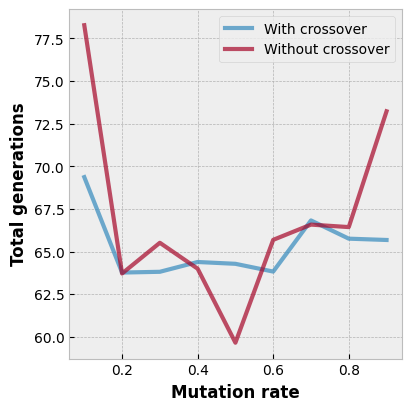

In [62]:
# Generate the sumplete game with absolute fitness evaluation
sumplete = Sumplete(K=4, evaluation_type="absolute", low=1, high=9)

# Setup variable params
experiment_setup  = {
    "p_flip": np.arange(0.1, 1.0, 0.1),
    "p_c": np.array([0.7, 0.0]),
}

# Setup static params
default_kwargs = {
    "fitness_fn": sumplete,
    'D': sumplete.K**2,
    "p_m": 1.0,
    "mutation_type": "bit_flip",
    "max_generations": 1000,
    "returnable": "num_generations",
    "best_score": 1,
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    BinaryGeneticAlgorithm.experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=1000,
    dirname="../experiments/problem2/runs",
)

# Visualize the results on a plot
visualize_optimization_experiments(
    xs={"Mutation rate": experiment_setup["p_flip"]},
    ys={"Total generations": results[("p_flip", "p_c")]},
    curve_labels=["With crossover", "Without crossover"],
    filepath="../experiments/problem2/plots/absolute_mutation.png",
)

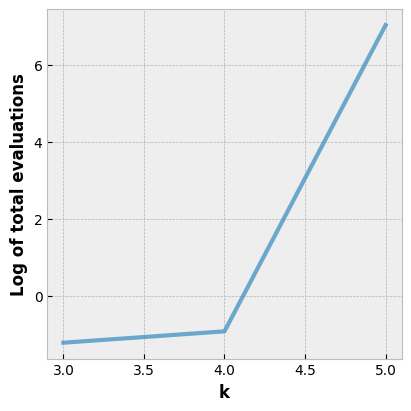

In [61]:
# Setup variable params
experiment_setup  = {
    ('N', 'K'): [(1, 3), (66, 4), (33554, 5)],
}

# Setup static params
default_kwargs = {
    "evaluation_type": "absolute",
    "use_refit": False,
    "use_escape": False,
    "p_m": 1.0,
    "p_flip": 0.5,
    "mutation_type": "bit_flip",
    "max_generations": 10000,
    "best_score": 1,
    "returnable": ("score", "duration", "num_evaluations"),
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=10,
    average=False,
    dirname="../experiments/problem2/runs",
)

# Check the average number of total evaluations
num_eval = results[('N', 'K')][:, :, 1:2].mean(axis=1)

# Visualize the results on a plot
visualize_optimization_experiments(
    xs={"k": [nk[1] for nk in experiment_setup[("N", "K")]]},
    ys={"Log of total evaluations": np.log(num_eval)},
    filepath="../experiments/problem2/plots/absolute_k.png",
)

## Question (b)

  0%|          | 0/20 [00:00<?, ?it/s]

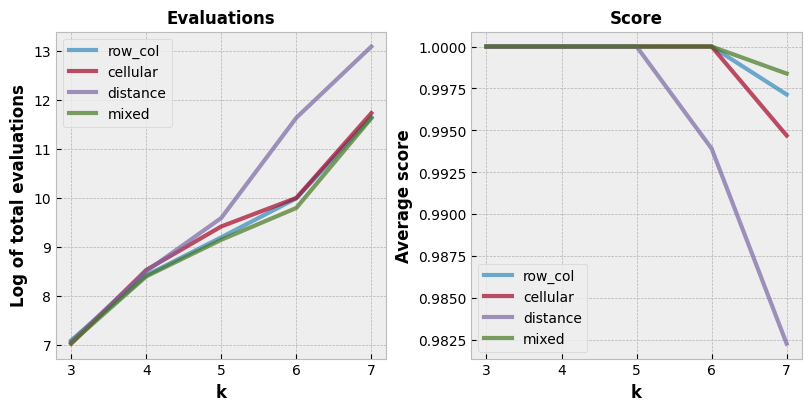

In [76]:
# Setup variable params
experiment_setup  = {
    'K': [3, 4, 5, 6, 7],
    "evaluation_type": ["row_col", "cellular", "distance", "mixed"],
}

# Setup static params
default_kwargs = {
    "crossover_type": "row_col_swap",
    "mutation_type": "row_col_shuffle",
    "max_generations": 2000,
    "best_score": 1,
    "returnable": ("score", "num_evaluations"),
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=100,
    is_cartesian_product=True,
    dirname="../experiments/problem2/runs",
)

# Visualize the results on a plot
visualize_optimization_experiments(
    xs={"k": experiment_setup['K']},
    ys={"Evaluations": np.log(results[('K', "evaluation_type")][:, :, 1]),
        "Score": results[('K', "evaluation_type")][:, :, 0]},
    curve_labels=experiment_setup["evaluation_type"],
    labels=["Log of total evaluations", "Average score"],
    filepath="../experiments/problem2/plots/sumplete_k.png",
)

## Question (c)

### Selection

  0%|          | 0/30 [00:00<?, ?it/s]

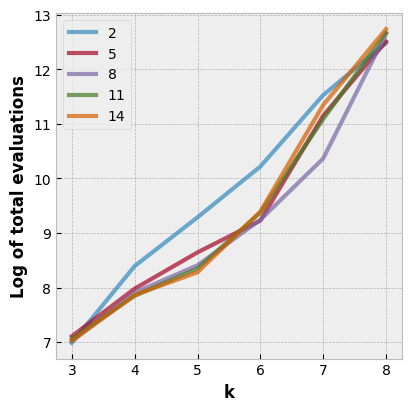

In [71]:
# Setup variable params
experiment_setup  = {
    'K': [3, 4, 5, 6, 7, 8],
    "tournament_size": np.arange(2, 15, 3),
}

# Setup static params
default_kwargs = {
    "crossover_type": "row_col_swap",
    "mutation_type": "bit_flip",
    "max_generations": 1000,
    "best_score": 1,
    "returnable": ("score", "num_evaluations"),
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=50,
    is_cartesian_product=True,
    dirname="../experiments/problem2/runs",
)

# # Visualize the results on a plot
visualize_optimization_experiments(
    xs={"k": experiment_setup['K']},
    ys={"Log of total evaluations": np.log(results[('K', "tournament_size")][:, :, 1])},
    curve_labels=list(experiment_setup["tournament_size"]),
    filepath="../experiments/problem2/plots/tournament_size.png",
)

### Crossover

  0%|          | 0/30 [00:00<?, ?it/s]

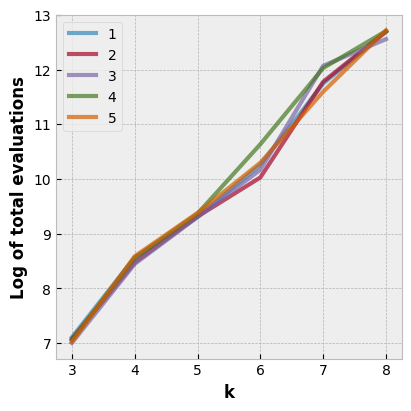

In [72]:
# Setup variable params
experiment_setup = {
    'K': [3, 4, 5, 6, 7, 8],
    "num_cross_points": np.arange(1, 6),
}

# Setup static params
default_kwargs = {
    "crossover_type": "n_point",
    "mutation_type": "bit_flip",
    "p_m": 0.05,
    "max_generations": 1000,
    "best_score": 1,
    "returnable": ("score", "num_evaluations"),
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=50,
    is_cartesian_product=True,
    dirname="../experiments/problem2/runs",
)

# Visualize the results on a plot
visualize_optimization_experiments(
    # xs={"Number of points": experiment_setup["num_cross_points"]},
    xs={"k": experiment_setup["K"]},
    ys={"Log of total evaluations": np.log(results[('K', "num_cross_points")][:, :, 1])},
    # curve_labels=[f"k={k}" for k in experiment_setup["K"]],
    curve_labels=list(experiment_setup["num_cross_points"]),
    ignore_suffix_y=True,
    filepath="../experiments/problem2/plots/num_cross_points.png",
)

  0%|          | 0/60 [00:00<?, ?it/s]

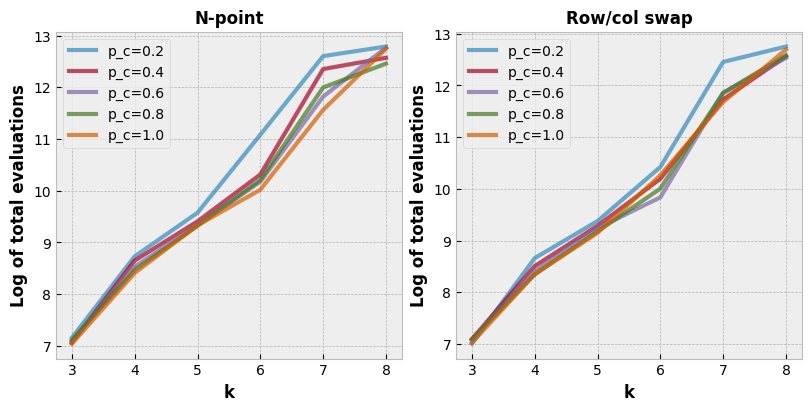

In [73]:
# Setup variable params
experiment_setup = {
    'K': [3, 4, 5, 6, 7, 8],
    "p_c": np.arange(0.2, 1.1, 0.2),
    "crossover_type": ["n_point", "row_col_swap"],
}

# Setup static params
default_kwargs = {
    "mutation_type": "bit_flip",
    "p_m": 0.05,
    "max_generations": 1000,
    "best_score": 1,
    "returnable": ("score", "num_evaluations"),
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=50,
    is_cartesian_product=True,
    dirname="../experiments/problem2/runs",
)

# Visualize the results on a plot
visualize_optimization_experiments(
    xs={"k": experiment_setup["K"]},
    ys={"N-point": np.log(results[('K', "p_c", "crossover_type")][:, :, 0, 1]),
        "Row/col swap": np.log(results[('K', "p_c", "crossover_type")][:, :, 1, 1])},
    curve_labels=[f"p_c={p_c:.1f}" for p_c in experiment_setup["p_c"]],
    labels="Log of total evaluations",
    ignore_suffix_y=True,
    filepath="../experiments/problem2/plots/crossover.png",
)

### Mutation

  0%|          | 0/30 [00:00<?, ?it/s]

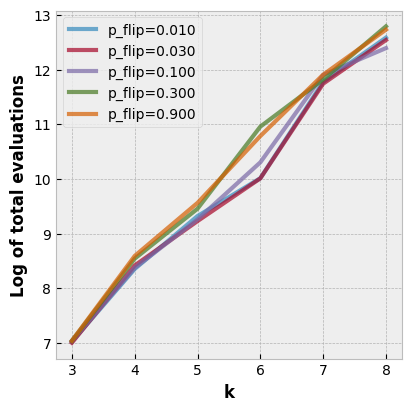

In [74]:
# Setup variable params
experiment_setup = {
    'K': [3, 4, 5, 6, 7, 8],
    "p_flip": [0.01, 0.03, 0.1, 0.3, 0.9],
}

# Setup static params
default_kwargs = {
    "crossover_type": "row_col_swap",
    "mutation_type": "bit_flip",
    "p_m": 0.2,
    "max_generations": 1000,
    "best_score": 1,
    "returnable": ("score", "num_evaluations"),
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=50,
    is_cartesian_product=True,
    dirname="../experiments/problem2/runs",
)

# Visualize the results on a plot
visualize_optimization_experiments(
    xs={"k": experiment_setup["K"]},
    ys={"Log of total evaluations": np.log(results[('K', "p_flip")][:, :, 1])},
    curve_labels=[f"p_flip={p_flip:.2f}" for p_flip in experiment_setup["p_flip"]],
    ignore_suffix_y=True,
    filepath="../experiments/problem2/plots/p_flip.png",
)

  0%|          | 0/48 [00:00<?, ?it/s]

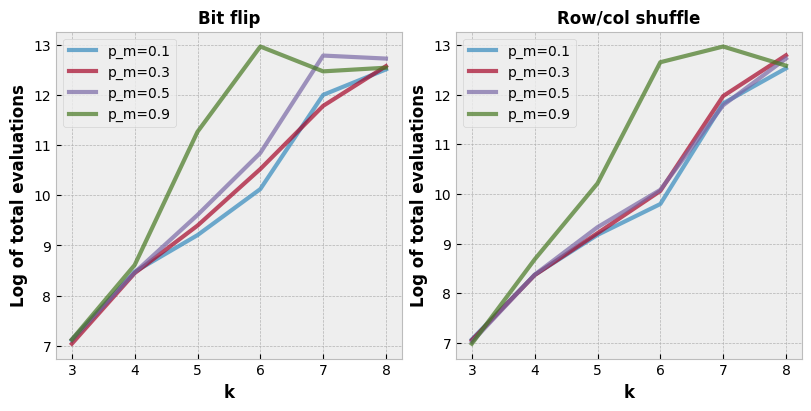

In [80]:
# Setup variable params
experiment_setup = {
    'K': [3, 4, 5, 6, 7, 8],
    "p_m": [0.1, 0.3, 0.5, 0.9],
    "mutation_type": ["bit_flip", "row_col_shuffle"],
}

# Setup static params
default_kwargs = {
    "crossover_type": "row_col_swap",
    "max_generations": 1000,
    "best_score": 1,
    "returnable": ("score", "num_evaluations"),
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=50,
    is_cartesian_product=True,
    dirname="../experiments/problem2/runs",
)

# Visualize the results on a plot
visualize_optimization_experiments(
    xs={"k": experiment_setup["K"]},
    ys={"Bit flip": np.log(results[('K', "p_m", "mutation_type")][:, :, 0, 1]),
        "Row/col shuffle": np.log(results[('K', "p_m", "mutation_type")][:, :, 1, 1])},
    curve_labels=[f"p_m={p_c:.1f}" for p_c in experiment_setup["p_m"]],
    labels="Log of total evaluations",
    ignore_suffix_y=True,
    filepath="../experiments/problem2/plots/mutation.png",
)

### Algorithmic

  0%|          | 0/24 [00:00<?, ?it/s]

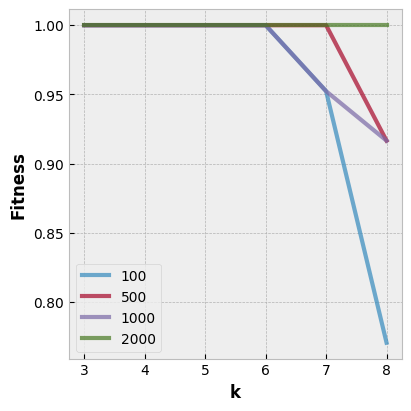

In [78]:
# Setup variable params
experiment_setup = {
    'K': [3, 4, 5, 6, 7, 8],
    "N": [100, 500, 1000, 2000],
}

# Setup static params
default_kwargs = {
    "crossover_type": "row_col_swap",
    "mutation_type": "bit_flip",
    "max_generations": 2000,
    "best_score": 1,
    "returnable": ("score", "num_evaluations"),
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=30,
    is_cartesian_product=True,
    dirname="../experiments/problem2/runs",
)

# Visualize the results on a plot
visualize_optimization_experiments(
    xs={"k": experiment_setup['K']},
    ys={"Fitness": results[('K', 'N')][:, :, 0]},
    curve_labels=experiment_setup["N"],
    filepath="../experiments/problem2/plots/n.png",
)

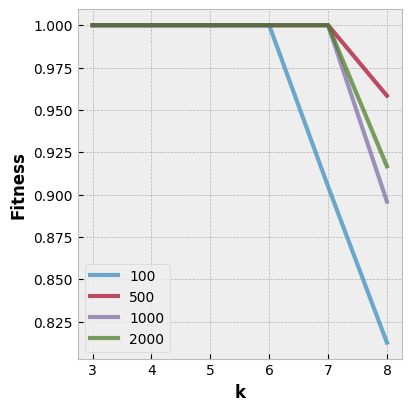

In [64]:
# Setup variable params
experiment_setup = {
    'K': [3, 4, 5, 6, 7, 8],
    "max_generations": [100, 500, 1000, 2000],
}

# Setup static params
default_kwargs = {
    "evaluation_type": "row_col",
    "crossover_type": "row_col_swap",
    "mutation_type": "bit_flip",
    "best_score": 1,
    "returnable": ("score", "num_evaluations"),
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=30,
    is_cartesian_product=True,
    dirname="../experiments/problem2/runs",
)

# Visualize the results on a plot
visualize_optimization_experiments(
    xs={"k": experiment_setup['K']},
    ys={"Fitness": results[('K', "max_generations")][:, :, 0]},
    curve_labels=experiment_setup["max_generations"],
    filepath="../experiments/problem2/plots/max_generations.png",
)

## Appendix B

In [58]:
# Setup variable params
experiment_setup = {
    ('K', "high"): [(7, 49), (8, 64), (9, 81), (10, 100)],
}

# Setup static params
default_kwargs = {
    "best_score": 1,
    "max_generations": 200,
    "returnable": ("score", "num_evaluations"),
    "patience": None,
}

# Run the experiment based on variable params
results1 = run_optimization_experiment(
    experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=30,
    dirname="../experiments/problem2/runs",
)

  0%|          | 0/4 [00:00<?, ?it/s]

In [59]:
# Setup variable params
experiment_setup = {
    'K': [7, 8, 9, 10]
}

# Setup static params
default_kwargs = {
    "best_score": 1,
    "max_generations": 200,
    "returnable": ("score", "num_evaluations"),
    "patience": None,
}

# Run the experiment based on variable params
results2 = run_optimization_experiment(
    experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=30,
    dirname="../experiments/problem2/runs",
)

  0%|          | 0/4 [00:00<?, ?it/s]

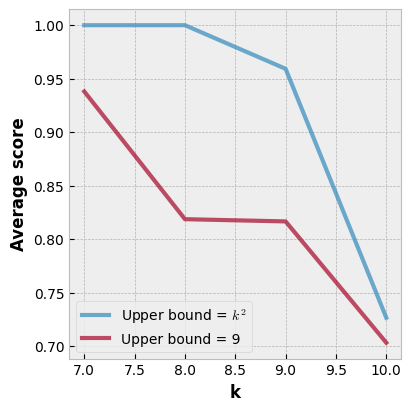

In [57]:
# Compute the combined fitness from both experiments
fitness = np.stack([results1[('K', 'high')][:, 0], results2['K'][:, 0]], axis=1)

# Visualize the results on a plot
visualize_optimization_experiments(
    xs={"k": [k for k in experiment_setup['K']]},
    ys={"Average score": fitness},
    curve_labels=["Upper bound = $k^2$", "Upper bound = 9"],
    filepath="../experiments/problem2/plots/game_complexity.png",
)